In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("iris.csv")


In [5]:
data.shape

(150, 6)

In [6]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
featurenames=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
features=data.loc[:,featurenames]

In [8]:
features = StandardScaler().fit_transform(features)


In [9]:
print(features)


[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [10]:
featurenames=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
#Seperating Features
features=data.loc[:,featurenames]
#Seperating target
labels=data.loc[:,'Species']
features=StandardScaler().fit_transform(features)


In [11]:
pca = PCA(n_components=2)
pct = pca.fit_transform(features)
print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
display(principal_df)
finaldf= pd.concat([principal_df,labels],axis=1)

[0.72770452 0.95800975]


,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [12]:
print(principal_df)

          pc1       pc2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


In [13]:
display(finaldf)

,pc1,pc2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


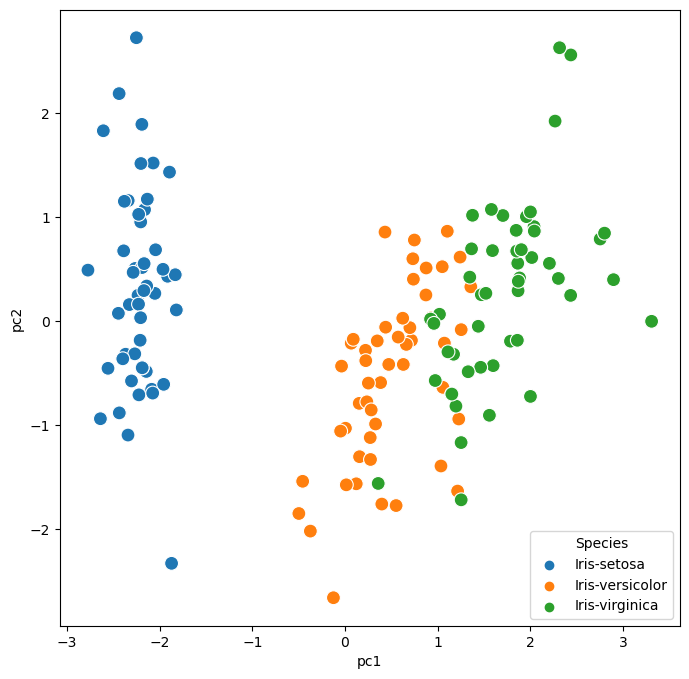

In [14]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='Species', data=finaldf,s=100)
plt.show()

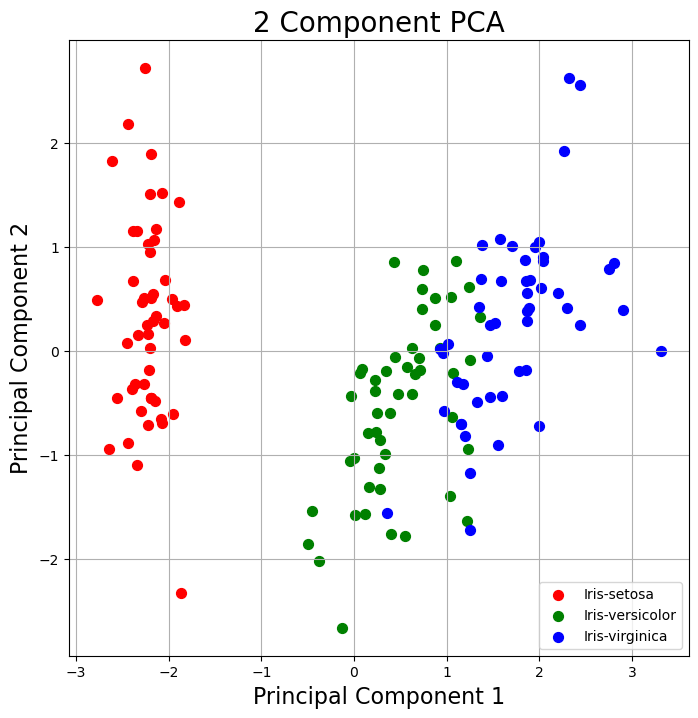

In [15]:
fig = plt.figure(figsize = (8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=16)
ax.set_ylabel('Principal Component 2',fontsize=16)
ax.set_title('2 Component PCA',fontsize=20)
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
  indicesToKeep=labels==target
  ax.scatter(finaldf.loc[indicesToKeep,'pc1'],finaldf.loc[indicesToKeep,'pc2'], c = color, s = 50)
ax.legend(targets)
ax.grid()


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
features = finaldf[['pc1', 'pc2']]
label = finaldf['Species']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.35, random_state=101,shuffle=True)
model = LogisticRegression()


In [19]:
model.fit(x_train, y_train)

LogisticRegression()

In [20]:

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [21]:
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)*100:.2f}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)*100:.2f}")

Train Accuracy:90.72
Test Accuracy:92.45


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

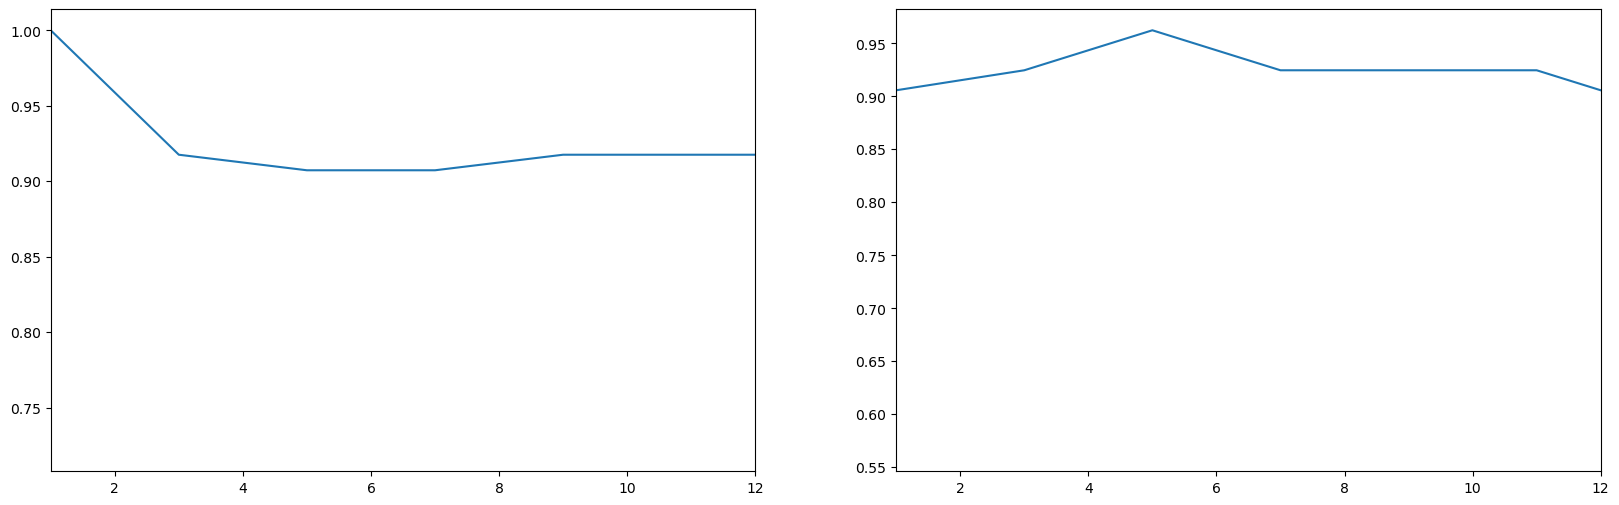

In [22]:
train_acc = []
test_acc = []
k_range = list(range(1, 90, 2))
for k in k_range:
      model = KNeighborsClassifier(k)
      model.fit(x_train, y_train)
      y_pred_test = model.predict(x_test)
      y_pred_train = model.predict(x_train)
      train_acc.append(accuracy_score(y_train, y_pred_train))
      test_acc.append(accuracy_score(y_test, y_pred_test))
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(k_range, train_acc)
plt.xlim(1, 12)
plt.subplot(122)
plt.plot(k_range, test_acc)
plt.xlim(1, 12)
plt.show()